# GeoPandas

- skip_exec: true


In [ ]:
from pathlib import Path

import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import LineString

pd.set_option("display.max_columns", None)

plt.rcParams["figure.facecolor"] = (1, 1, 1, 0)  # RGBA tuple with alpha=0
plt.rcParams["axes.facecolor"] = (1, 1, 1, 0)  # RGBA tuple with alpha=0

PROJECT_ROOT = Path.cwd().parent.parent

In [ ]:
lands_data = gpd.read_file(f"{PROJECT_ROOT}/data/kaggle_geospatial/DEC_lands/DEC_lands/DEC_lands.shp")

POI_data = gpd.read_file(
    f"{PROJECT_ROOT}/data/kaggle_geospatial/DEC_pointsinterest/DEC_pointsinterest/Decptsofinterest.shp"
)

roads_trails = gpd.read_file(
    f"{PROJECT_ROOT}/data/kaggle_geospatial/DEC_roadstrails/DEC_roadstrails/Decroadstrails.shp"
)

counties = gpd.read_file(
    f"{PROJECT_ROOT}/data/kaggle_geospatial/NY_county_boundaries/NY_county_boundaries/NY_county_boundaries.shp"
)


Every GeoDataFrame contains a special `geometry` column.

While this column can contain a variety of different datatypes, each entry will typically be a Point, LineString, or Polygon. These three types of geometric objects have built-in attributes that you can use to quickly analyze the dataset.

For instance, you can get the x- and y-coordinates of a Point from the x and y attributes, respectively.


In [ ]:
POI_data["geometry"].head()


0    POINT (505138.696 4649388.247)
1    POINT (333481.874 4692737.800)
2    POINT (525210.784 4833837.295)
3    POINT (231909.125 4712818.500)
4    POINT (193656.734 4679632.500)
Name: geometry, dtype: geometry

In [ ]:
POI_data["geometry"].x.head()

0    505138.696169
1    333481.873865
2    525210.783740
3    231909.124843
4    193656.734407
dtype: float64

And, you can get the length of a LineString from the length attribute.


In [ ]:
roads_trails["geometry"].head()


0    LINESTRING (511367.312 4804744.000, 511442.406...
1    LINESTRING (512806.962 4804560.806, 512796.625...
2    MULTILINESTRING ((515866.032 4804650.001, 5158...
3    LINESTRING (533975.501 4796126.500, 533992.812...
4    LINESTRING (531496.700 4799892.919, 531482.375...
Name: geometry, dtype: geometry

In [ ]:
roads_trails["geometry"].length.head()

0     1577.112643
1      945.366235
2     3853.119292
3    10485.458536
4     1432.490031
dtype: float64

Or, you can get the area of a Polygon from the area attribute.


In [ ]:
lands_data["geometry"].head()

0    POLYGON ((486093.245 4635308.586, 486787.235 4...
1    POLYGON ((491931.514 4637416.256, 491305.424 4...
2    POLYGON ((486000.287 4635834.453, 485007.550 4...
3    POLYGON ((541716.775 4675243.268, 541217.579 4...
4    POLYGON ((583896.043 4909643.187, 583891.200 4...
Name: geometry, dtype: geometry

In [ ]:
lands_data["geometry"].area.head()

0    2.990365e+06
1    1.143940e+06
2    9.485476e+05
3    1.822293e+06
4    2.821959e+05
dtype: float64

The geometry data can be displayed by calling the plot method displayed when we call the `plot()` method.


In [ ]:
wild_lands = lands_data.loc[lands_data["CLASS"].isin(["WILD FOREST", "WILDERNESS"])].copy()
campsites = POI_data.loc[POI_data["ASSET"] == "PRIMITIVE CAMPSITE"].copy()
trails = roads_trails.loc[roads_trails["ASSET"] == "FOOT TRAIL"].copy()


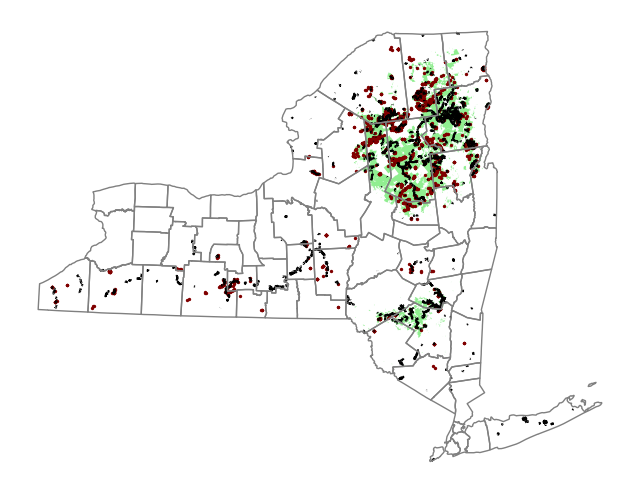

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
counties.plot(color="none", edgecolor="grey", zorder=3, ax=ax, label="County")
wild_lands.plot(color="lightgreen", ax=ax, label="Wild lands")
campsites.plot(color="maroon", markersize=2, ax=ax, label="Campsites")
trails.plot(color="black", markersize=1, ax=ax, label="Trails")
ax.set_axis_off()
plt.show()

## Coordinate Systems


Map projections are the ways the 3D world can be represented on a 2D surface. They can't be 100% accurate. Each projection distorts the surface of the Earth in some way, while retaining some useful property. For instance:

- The equal-area projections (like "Lambert Cylindrical Equal Area", or "Africa Albers Equal Area Conic") preserve area. This is a good choice, if you'd like to calculate the area of a country or city, for example.
- The equidistant projections (like "Azimuthal Equidistant projection") preserve distance. This would be a good choice for calculating flight distance.

We use a coordinate reference system (CRS) to show how the projected points correspond to real locations on Earth.

When we create a GeoDataFrame from a shapefile, the CRS is already imported for us:


In [ ]:
world.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
regions = gpd.read_file(f"{PROJECT_ROOT}/data/kaggle_geospatial/ghana/ghana/Regions/Map_of_Regions_in_Ghana.shp")

In [ ]:
regions


,Region,geometry
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84..."
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96..."
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69..."
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79..."
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67..."
5,Northern,"POLYGON ((818287.468 1185632.455, 818268.664 1..."
6,Upper East,"POLYGON ((811994.328 1230449.528, 812004.699 1..."
7,Upper West,"POLYGON ((658854.315 1220818.656, 659057.210 1..."
8,Volta,"POLYGON ((899718.788 875120.098, 899564.444 87..."
9,Western,"POLYGON ((490349.315 771271.143, 490530.091 77..."


In [ ]:
regions.crs


<Projected CRS: EPSG:32630>
Name: WGS 84 / UTM zone 30N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 6°W and 0°W, northern hemisphere between equator and 84°N, onshore and offshore. Algeria. Burkina Faso. Côte' Ivoire (Ivory Coast). Faroe Islands - offshore. France. Ghana. Gibraltar. Ireland - offshore Irish Sea. Mali. Mauritania. Morocco. Spain. United Kingdom (UK).
- bounds: (-6.0, 0.0, 0.0, 84.0)
Coordinate Operation:
- name: UTM zone 30N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Coordinate reference systems are referenced by European Petroleum Survey Group (EPSG) codes.

The `regions` GeoDataFrame uses `EPSG 32630`, which is more commonly called the "Mercator" projection. This projection preserves angles (making it useful for sea navigation) and slightly distorts area.

However, when creating a GeoDataFrame from a CSV file, we have to set the CRS. EPSG 4326 corresponds to coordinates in latitude and longitude.


In [ ]:
facilities_df = pd.read_csv(f"{PROJECT_ROOT}/data/kaggle_geospatial/ghana/ghana/health_facilities.csv")

facilities = gpd.GeoDataFrame(
    facilities_df,
    geometry=gpd.points_from_xy(
        facilities_df["Longitude"],
        facilities_df["Latitude"],
    ),
    crs="EPSG:4326",
)

facilities

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (-1.96317 7.40801)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (-1.58592 6.46312)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (-1.34982 6.22393)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (-1.61098 6.84177)
...,...,...,...,...,...,...,...,...,...
3751,Western,Sefwi-Akontombra,Ackaakrom CHPS,CHPS,Ackaakrom,Government,NaN,NaN,POINT EMPTY
3752,Western,Sefwi-Akontombra,Apprutu CHPS,CHPS,Apprutu,Government,NaN,NaN,POINT EMPTY
3753,Western,Sefwi-Akontombra,Kojokrom CHPS,CHPS,Kojokrom,Government,NaN,NaN,POINT EMPTY
3754,Western,Sefwi-Akontombra,Yawkrom CHPS,CHPS,Yawkrom,Government,NaN,NaN,POINT EMPTY


Re-projecting refers to the process of changing the CRS. This is done in GeoPandas with the `to_crs()` method. When plotting multiple GeoDataFrames, it's important that they all use the same CRS. In the code cell below, we change the CRS of the facilities GeoDataFrame to match the CRS of regions before plotting it. The `to_crs()`` method modifies only the "geometry" column: all other columns are left as-is.


In [ ]:
facilities.to_crs(epsg=32630)

,Region,District,FacilityName,Type,Town,Ownership,Latitude,Longitude,geometry
0,Ashanti,Offinso North,A.M.E Zion Clinic,Clinic,Afrancho,CHAG,7.40801,-1.96317,POINT (614422.662 818986.851)
1,Ashanti,Bekwai Municipal,Abenkyiman Clinic,Clinic,Anwiankwanta,Private,6.46312,-1.58592,POINT (656373.863 714616.547)
2,Ashanti,Adansi North,Aboabo Health Centre,Health Centre,Aboabo No 2,Government,6.22393,-1.34982,POINT (682573.395 688243.477)
3,Ashanti,Afigya-Kwabre,Aboabogya Health Centre,Health Centre,Aboabogya,Government,6.84177,-1.61098,POINT (653484.490 756478.812)
4,Ashanti,Kwabre,Aboaso Health Centre,Health Centre,Aboaso,Government,6.84177,-1.61098,POINT (653484.490 756478.812)
...,...,...,...,...,...,...,...,...,...
3751,Western,Sefwi-Akontombra,Ackaakrom CHPS,CHPS,Ackaakrom,Government,NaN,NaN,POINT EMPTY
3752,Western,Sefwi-Akontombra,Apprutu CHPS,CHPS,Apprutu,Government,NaN,NaN,POINT EMPTY
3753,Western,Sefwi-Akontombra,Kojokrom CHPS,CHPS,Kojokrom,Government,NaN,NaN,POINT EMPTY
3754,Western,Sefwi-Akontombra,Yawkrom CHPS,CHPS,Yawkrom,Government,NaN,NaN,POINT EMPTY


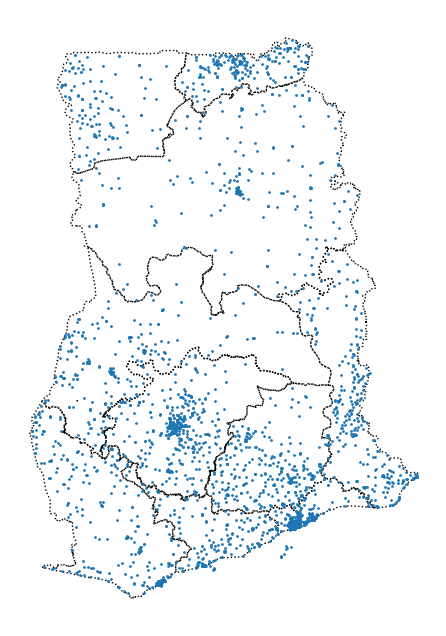

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
regions.plot(figsize=(8, 8), color="none", linestyle=":", edgecolor="black", ax=ax)
facilities.to_crs(epsg=32630).plot(markersize=1, ax=ax)
ax.set_axis_off()
plt.show()


In case the EPSG code is not available in GeoPandas, we can change the CRS with what's known as the "proj4 string" of the CRS. For instance, the proj4 string to convert to latitude/longitude coordinates is as follows:


In [ ]:
regions.to_crs("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

,Region,geometry
0,Ashanti,"POLYGON ((-1.30985 7.62302, -1.30786 7.62198, ..."
1,Brong Ahafo,"POLYGON ((-2.54567 8.76089, -2.54473 8.76071, ..."
2,Central,"POLYGON ((-2.06723 6.29473, -2.06658 6.29420, ..."
3,Eastern,"POLYGON ((-0.21751 7.21009, -0.21747 7.20993, ..."
4,Greater Accra,"POLYGON ((0.23456 6.10986, 0.23484 6.10974, 0...."
5,Northern,"POLYGON ((-0.09041 10.71194, -0.09061 10.70918..."
6,Upper East,"POLYGON ((-0.14402 11.11730, -0.14393 11.11679..."
7,Upper West,"POLYGON ((-1.54582 11.04027, -1.54411 11.01019..."
8,Volta,"POLYGON ((0.62403 7.90125, 0.62264 7.90174, 0...."
9,Western,"POLYGON ((-3.08737 6.97758, -3.08573 6.97675, ..."


In [ ]:
regions.loc[:, "area"] = regions["geometry"].area / 10**6

print(f"Area of Ghana: {regions['area'].sum()} square kilometers")
print("CRS:", regions.crs)
regions


Area of Ghana: 239584.5760055668 square kilometers
CRS: EPSG:32630


,Region,geometry,area
0,Ashanti,"POLYGON ((686446.075 842986.894, 686666.193 84...",24379.017777
1,Brong Ahafo,"POLYGON ((549970.457 968447.094, 550073.003 96...",40098.168231
2,Central,"POLYGON ((603176.584 695877.238, 603248.424 69...",9665.626760
3,Eastern,"POLYGON ((807307.254 797910.553, 807311.908 79...",18987.625847
4,Greater Accra,"POLYGON ((858081.638 676424.913, 858113.115 67...",3706.511145
5,Northern,"POLYGON ((818287.468 1185632.455, 818268.664 1...",69830.576358
6,Upper East,"POLYGON ((811994.328 1230449.528, 812004.699 1...",8629.357677
7,Upper West,"POLYGON ((658854.315 1220818.656, 659057.210 1...",19022.080963
8,Volta,"POLYGON ((899718.788 875120.098, 899564.444 87...",20948.296066
9,Western,"POLYGON ((490349.315 771271.143, 490530.091 77...",24317.315180


In the code cell above, since the CRS of the regions GeoDataFrame is set to EPSG 32630 (a "Mercator" projection), the area calculation is slightly less accurate than if we had used an equal-area projection like "Africa Albers Equal Area Conic". But this still yields the area of Ghana as approximately 239585 square kilometers, which is not too far off from the correct answer.


In [ ]:
birds_df = pd.read_csv(f"{PROJECT_ROOT}/data/kaggle_geospatial/purple_martin.csv", parse_dates=["timestamp"])
print(f"There are {birds_df['tag-local-identifier'].nunique()} different birds in the dataset.")
birds_df

There are 11 different birds in the dataset.


,timestamp,location-long,location-lat,tag-local-identifier
0,2014-08-15 05:56:00,-88.146014,17.513049,30448
1,2014-09-01 05:59:00,-85.243501,13.095782,30448
2,2014-10-30 23:58:00,-62.906089,-7.852436,30448
3,2014-11-15 04:59:00,-61.776826,-11.723898,30448
4,2014-11-30 09:59:00,-61.241538,-11.612237,30448
...,...,...,...,...
94,2014-12-30 19:59:00,-50.709645,-9.572583,30263
95,2015-01-14 23:59:00,-49.292113,-8.392265,30263
96,2015-01-30 03:59:00,-49.081317,-5.413250,30263
97,2015-02-14 07:59:00,-49.081245,-5.413251,30263


In [ ]:
birds = gpd.GeoDataFrame(
    birds_df,
    geometry=gpd.points_from_xy(
        birds_df["location-long"],
        birds_df["location-lat"],
    ),
    crs="EPSG:4326",
)


In [ ]:
world = gpd.read_file(f"{PROJECT_ROOT}/data/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
americas = world.loc[world["CONTINENT"].isin(["North America", "South America"])]
americas.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_ISO,ADM0_DIFF,ADM0_TLC,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,TLC_DIFF,FCLASS_TLC,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,CAN,0,Canada,CAN,0,Canada,CAN,0,Canada,Canada,CAN,Canada,NaN,Can.,CA,Canada,NaN,Canada,NaN,NaN,Canada,NaN,6,6,2,2,37589262.0,15,2019,1736425,2019,1. Developed region: G7,1. High income: OECD,CA,CA,CA,CAN,CAN,124,124,124,CA,CAN,23424775,23424775,Exact WOE match as country,CAN,NaN,CAN,CAN,CAN,CAN,CAN,CAN,CAN,CAN,CAN,CAN,CAN,CAN,CAN,CAN,CAN,CAN,CAN,CAN,CAN,CAN,CAN,CAN,CAN,CAN,CAN,CAN,CAN,CAN,CAN,CAN,CAN,CAN,-99,-99,North America,Americas,Northern America,North America,6,6,4,-99,1,0.0,1.7,5.7,-101.910700,60.324287,1159320467,Q16,كندا,কানাডা,Kanada,Canada,Canadá,کانادا,Canada,Καναδάς,קנדה,कनाडा,Kanada,Kanada,Canada,カナダ,캐나다,Canada,Kanada,Canadá,Канада,Kanada,Kanada,Канада,کینیڈا,Canada,加拿大,加拿大,Admin-0 country,NaN,Admin-0 country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,USA,0,United States of America,USA,0,United States,USA,0,United States of America,United States,USA,United States,NaN,U.S.A.,US,United States of America,NaN,United States,NaN,NaN,United States of America,NaN,4,5,1,1,328239523.0,17,2019,21433226,2019,1. Developed region: G7,1. High income: OECD,US,US,US,USA,USA,840,840,840,US,USA,23424977,23424977,Exact WOE match as country,USA,NaN,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,USA,-99,-99,North America,Americas,Northern America,North America,24,13,6,-99,1,0.0,1.7,5.7,-97.482602,39.538479,1159321369,Q30,الولايات المتحدة,মার্কিন যুক্তরাষ্ট্র,Vereinigte Staaten,United States of America,Estados Unidos,ایالات متحده آمریکا,États-Unis,Ηνωμένες Πολιτείες Αμερικής,ארצות הברית,संयुक्त राज्य अमेरिका,Amerikai Egyesült Államok,Amerika Serikat,Stati Uniti d'America,アメリカ合衆国,미국,Verenigde Staten van Amerika,Stany Zjednoczone,Estados Unidos,США,USA,Amerika Birleşik Devletleri,Сполучені Штати Америки,ریاستہائے متحدہ امریکا,Hoa Kỳ,美国,美國,Admin-0 country,NaN,Admin-0 country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
9,Admin-0 country,1,2,Argentina,ARG,0,2,Sovereign country,1,Argentina,ARG,0,Argentina,ARG,0,Argentina

In [ ]:
# GeoDataFrame showing path for each bird
path_df = birds.groupby("tag-local-identifier")["geometry"].apply(list).apply(lambda x: LineString(x)).reset_index()
path_gdf = gpd.GeoDataFrame(path_df, geometry=path_df.geometry, crs="EPSG:4326")

# GeoDataFrame showing starting point for each bird
start_df = birds.groupby("tag-local-identifier")["geometry"].apply(list).apply(lambda x: x[0]).reset_index()
start_gdf = gpd.GeoDataFrame(start_df, geometry=start_df.geometry, crs="EPSG:4326")

end_df = birds.groupby("tag-local-identifier")["geometry"].apply(list).apply(lambda x: x[-1]).reset_index()
end_gdf = gpd.GeoDataFrame(end_df, geometry=end_df.geometry, crs="EPSG:4326")

# Show first five rows of GeoDataFrame
start_gdf.head()

,tag-local-identifier,geometry
0,30048,POINT (-90.12992 20.73242)
1,30054,POINT (-93.60861 46.50563)
2,30198,POINT (-80.31036 25.92545)
3,30263,POINT (-76.78146 42.99209)
4,30275,POINT (-76.78213 42.99207)


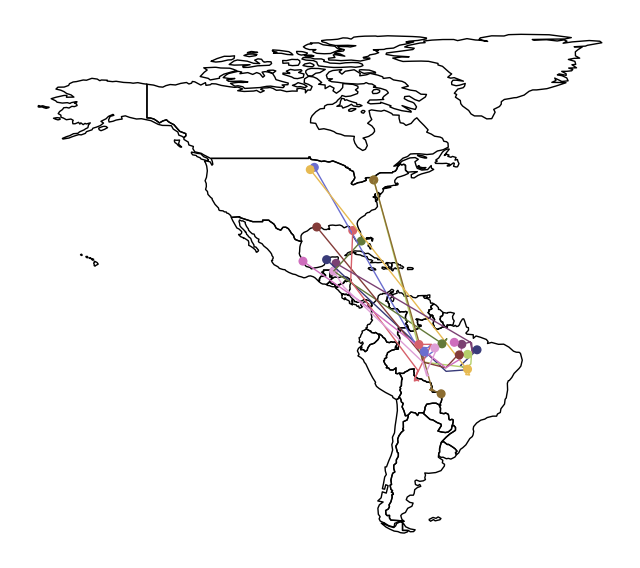

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
americas.plot(color="none", ax=ax)
start_gdf.plot(ax=ax, cmap="tab20b", markersize=30)
path_gdf.plot(ax=ax, cmap="tab20b", linestyle="-", linewidth=1, zorder=1)
end_gdf.plot(ax=ax, cmap="tab20b", markersize=30)
ax.set_axis_off()
plt.show()

In [ ]:
south_america = world.loc[world["CONTINENT"] == "South America"]

In [ ]:
total_area = south_america["geometry"].to_crs(epsg=3035).area.sum() / 10**6
print(total_area)

17759005.815061226


In [ ]:
protected_areas = gpd.read_file(
    f"{PROJECT_ROOT}/data/kaggle_geospatial/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile/SAPA_Aug2019-shapefile-polygons.shp"
)


In [ ]:
protected_area = sum(protected_areas["REP_AREA"] - protected_areas["REP_M_AREA"])
print(protected_area)


5396761.9116883585


In [ ]:
percentage_protected = protected_area / total_area
print(round(percentage_protected * 100, 2))

30.39


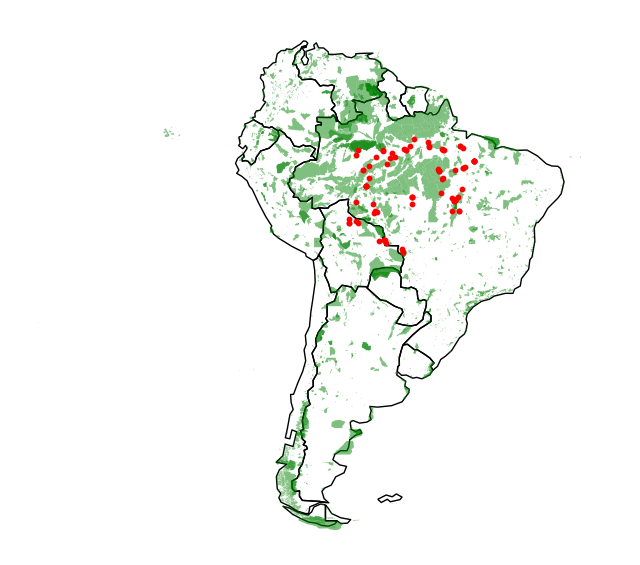

In [ ]:
protected_land_areas = protected_areas[protected_areas["MARINE"] != "2"]

fig, ax = plt.subplots(figsize=(8, 8))
south_america.plot(color="none", ax=ax)
protected_land_areas.plot(ax=ax, color="green", alpha=0.5)
birds[birds["geometry"].y < 0].plot(ax=ax, color="red", markersize=10)
ax.set_axis_off()
plt.show()